In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
import seaborn as sns

In [60]:
iris = datasets.load_iris()
x = iris.data[:, :2] # two dimensions
y = iris.target

In [61]:
params_1 = {'C': 1.0}
params_2 = {'C': 0.01}
params_3 = {'C': 100.0}
params_4 = {'C': 0.1}

In [62]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [63]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [64]:
models = (SVC(**params_1), SVC(**params_2), SVC(**params_3), SVC(**params_4))
models = (model.fit(x, y) for model in models)

In [65]:
titles = ['C=1.0', 'C=0.01', 'C=100.0', 'C=100.0']

In [66]:
X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

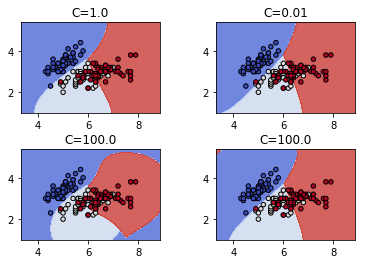

In [67]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for model, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()